# 환경설정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.getcwd()

'/content'

In [5]:
path = '/content/drive/MyDrive/DSL 정규세션/0804_supervised_learning'    # 과제 데이터셋이 저장된 경로를 작성
os.chdir(path)

In [6]:
os.getcwd()

'/content/drive/MyDrive/DSL 정규세션/0804_supervised_learning'

In [7]:
# !pip install scikit-learn

사용할 데이터 셋 :  전력 사용량 예측 모델

# 데이터

건물 정보와 기후 정보를 활용한 전력사용량 예측 데이터 중에서 

환경 변수(기온, 풍속, 습도, 강수량, 일조)에 대해 전력 사용량을 선형회귀 모델을 사용해서 예측해보고자 합니다.

In [84]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [101]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [102]:
def load_data():
    data = pd.read_csv('data/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [103]:
train_x, train_y, test_x, test_y = load_data()

## 데이터 확인 

주의! 최종 예측하는 단계 이전에는 현재 가지고 있는 데이터, 즉 train data만을 이용하여 작업을 진행해야 합니다.

현재 가지고 있는 데이터 train_x를 보고 전력 사용량을 예측하는데에 사용할 변수를 선택해주세요.

기초세션에서 다뤘던 내용을 참고하셔서 최적의 변수 조합을 찾아보도록 합시다.

이 때 선택해야하는 변수는 하나일 수도 있고, 여러개의 변수를 사용하여도 좋습니다.

In [88]:
# 데이터 셋을 둘러보는 코드 작성하시고, 왜 좋은지 한번 둘러보세요!
train_x.head()

,Temp,Wind,Moisture,Precipitation,Sun
0,17.6,2.5,92.0,0.8,0.0
1,17.7,2.9,91.0,0.3,0.0
2,17.5,3.2,91.0,0.0,0.0
3,17.1,3.2,91.0,0.0,0.0
4,17.0,3.3,92.0,0.0,0.0


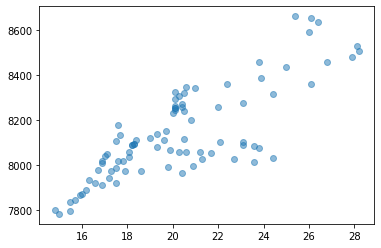

In [89]:
# 산점도: 기온 & 전력사용량 
X = train_x.Temp.values
Y = train_y.values
plt.scatter(X, Y, alpha=0.5)

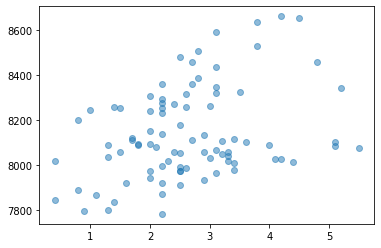

In [90]:
# 산점도: 풍속 & 전력사용량 
X = train_x.Wind.values
Y = train_y.values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)

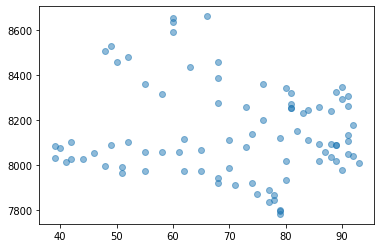

In [91]:
#산점도: 습도 & 전력사용량
X = train_x.Moisture.values
Y = train_y.values
plt.scatter(X, Y, alpha=0.5)

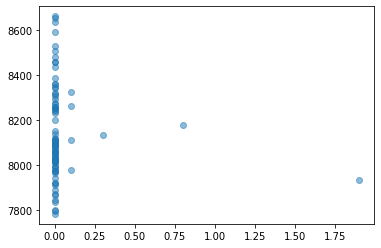

In [92]:
#산점도: 강수량 & 전력사용량 
X = train_x.Precipitation.values
Y = train_y.values
plt.scatter(X, Y, alpha=0.5)

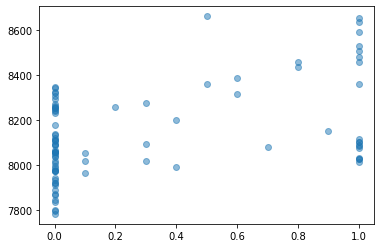

In [93]:
#산점도: 일조 & 전력사용량
X = train_x.Sun.values
Y = train_y.values
plt.scatter(X, Y, alpha=0.5)

In [94]:
train_xy = pd.concat([train_x, train_y], axis = 1)

In [95]:
train_xy.corr() #상관계수

,Temp,Wind,Moisture,Precipitation,Sun,Wh
Temp,1.000000,0.510935,-0.628642,-0.173210,0.783829,0.803301
Wind,0.510935,1.000000,-0.478825,0.028617,0.544720,0.349288
Moisture,-0.628642,-0.478825,1.000000,0.152529,-0.699047,-0.095042
Precipitation,-0.173210,0.028617,0.152529,1.000000,-0.123846,-0.090389
Sun,0.783829,0.544720,-0.699047,-0.123846,1.000000,0.458348
Wh,0.803301,0.349288,-0.095042,-0.090389,0.458348,1.000000


최종 선택한 변수(들)이 왜 선택받았는지 간단히 알려주세요.<br>

답변 : 기온만 예측변수로 선택하였습니다.  
산점도와 상관계수로 판단했을 때, 타깃변수를 가장 잘 설명하는 예측변수는 기온이어서(상관계수 0.80803301) 이를 회귀식에 포함시키기로 하였습니다. 다른 예측변수들은 타깃변수와의 상관계수가 충분히 높지 않거나 기온과 상관계수가 높아 다중공선성이 우려되어 선택하지 않았습니다.

## 전처리

위에서 선택한 변수들(feature)를 가지고 한번 전력 사용량을 예측하는 모델을 만들어 보기에 앞서,

**train 데이터의 feature의 전처리**를 진행해보려고 합니다. StandardScaler를 사용하셔도 좋고, MinMaxScaler를 사용하셔도 좋습니다! 

또한 PolynomialFeatures를 이용하거나 직접 feature를 계산하여 고차원의 feature를 만드셔도 좋습니다. 이 또한 정답은 없습니다!

이 때 최종 train_x의 shape은 (n_samples, n_features)가 되도록 해주세요.<br>
ex. 4개의 변수를 가진 1000개의 샘플의 경우 train_x.shape은 (1000,4)가 되면 됩니다.

특히 하나의 변수만을 사용하시는 분들은 1D가 아닌 2D가 되도록 신경써주세요<br>
ex. train_x.shape이 (1000,)이 아닌 (1000,1)입니다!

In [115]:
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler 불러오기

In [118]:
train_x1 = train_x.drop(["Moisture", "Wind", "Precipitation", "Sun"], axis = 1) #필요없는 컬럼 삭제

In [119]:
train_x1.columns

Index(['Temp'], dtype='object')

In [120]:
train_x.columns #원본 그대로 두기

Index(['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun'], dtype='object')

In [121]:
scaler = MinMaxScaler()
processed_data = scaler.fit_transform(train_x1)
processed_data 

array([[0.20895522],
       [0.21641791],
       [0.20149254],
       [0.17164179],
       [0.1641791 ],
       [0.15671642],
       [0.14179104],
       [0.15671642],
       [0.2238806 ],
       [0.3358209 ],
       [0.42537313],
       [0.54477612],
       [0.61940299],
       [0.61940299],
       [0.65671642],
       [0.67164179],
       [0.71641791],
       [0.65671642],
       [0.58955224],
       [0.48507463],
       [0.37313433],
       [0.28358209],
       [0.23134328],
       [0.17910448],
       [0.13432836],
       [0.10447761],
       [0.08208955],
       [0.06716418],
       [0.05223881],
       [0.        ],
       [0.01492537],
       [0.05223881],
       [0.08955224],
       [0.15671642],
       [0.18656716],
       [0.20149254],
       [0.1119403 ],
       [0.20149254],
       [0.41791045],
       [0.45522388],
       [0.51492537],
       [0.47761194],
       [0.43283582],
       [0.41044776],
       [0.38059701],
       [0.35820896],
       [0.3358209 ],
       [0.313

In [122]:
processed_data.shape #shape 확인하기

(88, 1)

# 모델링

## 학습 

이제 모델링을 해봅시다.

앞서 다룬 여러 regression 모델들(Linear regression, Ridge Regression, Lasso Regression, ..)을 이용해서 fit을 진행해보도록 합시다.

### Linear Regression (변수 1개)

In [123]:
# 사용할 패키지를 import!
from sklearn.linear_model import LinearRegression

In [161]:
linear_model = LinearRegression().fit(train_x1, train_y)
linear_beta = round(float(linear_model.coef_), 4)
linear_intercept = round(linear_model.intercept_, 4)
print("Beta : ", linear_beta)
print("Intercept : ", linear_intercept)

Beta :  49.8115
Intercept :  7133.8431


## 추정

이제 train_x를 이용하여 전력사용량을 추정해보도록 합시다.

In [162]:
esti_y = linear_model.predict(train_x1)

# Loss 및 시각화

앞서 fitting하여 얻은 모델을 이용하여 추정한 값으로 MSE를 측정해봅시다. 변수를 하나만 사용하신 분들은 xy 평면에 한번 같이 시각화도 해보셔도 좋습니다.

In [163]:
def mse(pred, true):
    return np.mean((pred-true)**2)

In [164]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.4f}")

Linear 14543.7583


In [165]:
def visualize(model, x, y):
    if x.shape[1] != 1:
        return None
    beta = model.coef_[0]
    intercept = model.intercept_
    
    x_axis = np.linspace(np.min(x), np.max(x), 100)
    fit = intercept * x_axis**0 + beta*x_axis 

    plt.figure(figsize=(8,6))
    plt.plot(x_axis, fit, label='Predict', c='r', linewidth=3)
    plt.scatter(x, y, c='blue')
    plt.legend()
    plt.show()

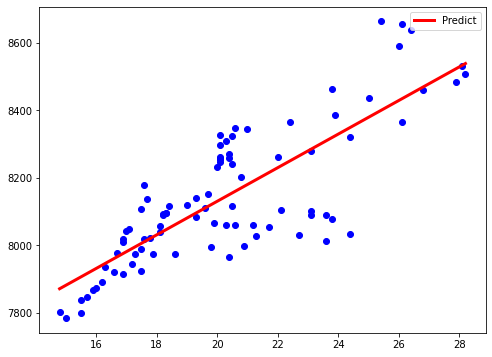

In [166]:
#visualization 하실 분은 진행해주세요!
visualize(linear_model, train_x1, train_y)

# 예측

테스트셋에 대해서 한번 **예측**해보도록 합시다.

이미 fitting된 모델 (그리고 scaler를 사용하신다면 scaler)에 대해 **fit을 하지 말고** 단순히 predict만 진행해보도록 합시다. 

scaler는 transform만 하시고 model은 predict을 진행해주세요

In [167]:
test_x1 = test_x.drop(["Wind", "Precipitation", "Moisture", "Sun"], axis = 1)

In [168]:
test_x1.shape

(12, 1)

In [170]:
# transform을 하시는 분들은 실행해주세요
test_x_minmax = scaler.transform(test_x1)
test_x_minmax

array([[0.70895522],
       [0.62686567],
       [0.59701493],
       [0.51492537],
       [0.49253731],
       [0.44776119],
       [0.41044776],
       [0.38059701],
       [0.36567164],
       [0.35074627],
       [0.3358209 ],
       [0.3358209 ]])

In [174]:
# y1_hat에 predict값 할당
pred_y = linear_model.predict(test_x1)

# 성능 평가

한번 학습한 모델에 대해 test_y를 이용하여 mse loss를 측정해도도록 합시다.

In [175]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [176]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 198060.52184


In [177]:
score(train_mse,test_mse)

 13.6182


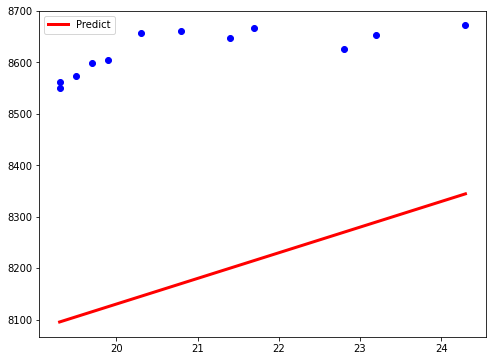

In [178]:
# visualization 하실 분은 진행해주세요!
visualize(linear_model, test_x1, test_y)

test 세트에서 성능평가를 한 결과, 모델의 성능이 그리 좋지 않음을 확인할 수 있다.

# 그 이후

이제 여러분들은 한번 모델을 만들어보고 fitting한 다음 예측까지 해보셨습니다.

이제 개선하기 위해 1.데이터부터 5.성능평가 중 수정, 변경하실 부분을 업데이트 해서  최적의 모델을 찾아보세요!

현재 사용하고 있는 scaler, model부터 전처리과정 기타 여러 조건을 조작해보시고 어떤 효과가 있는지 한번 보시고 알려주세요:D

고생하셨습니다!

### Linear Regression (변수 2개)

기온 외에 풍속 변수를 추가해보겠습니다.

In [187]:
train_x2 = train_x.drop(["Moisture", "Precipitation", "Sun"], axis = 1)

In [188]:
train_x2.columns

Index(['Temp', 'Wind'], dtype='object')

In [190]:
scaler = MinMaxScaler()
processed_data = scaler.fit_transform(train_x2)
processed_data 

array([[0.20895522, 0.41176471],
       [0.21641791, 0.49019608],
       [0.20149254, 0.54901961],
       [0.17164179, 0.54901961],
       [0.1641791 , 0.56862745],
       [0.15671642, 0.58823529],
       [0.14179104, 0.58823529],
       [0.15671642, 0.37254902],
       [0.2238806 , 0.56862745],
       [0.3358209 , 0.33333333],
       [0.42537313, 0.58823529],
       [0.54477612, 0.62745098],
       [0.61940299, 0.70588235],
       [0.61940299, 0.92156863],
       [0.65671642, 0.92156863],
       [0.67164179, 1.        ],
       [0.71641791, 0.50980392],
       [0.65671642, 0.78431373],
       [0.58955224, 0.7254902 ],
       [0.48507463, 0.74509804],
       [0.37313433, 0.41176471],
       [0.28358209, 0.41176471],
       [0.23134328, 0.31372549],
       [0.17910448, 0.31372549],
       [0.13432836, 0.23529412],
       [0.10447761, 0.07843137],
       [0.08208955, 0.1372549 ],
       [0.06716418, 0.        ],
       [0.05223881, 0.09803922],
       [0.        , 0.17647059],
       [0.

In [198]:
linear_model = LinearRegression().fit(train_x2, train_y)
linear_beta = linear_model.coef_
linear_intercept = linear_model.intercept_
print("Beta : ", linear_beta)
print("Intercept : ", linear_intercept)

Beta :  [ 52.43315338 -15.56433891]
Intercept :  7121.717238945766


In [199]:
esti_y = linear_model.predict(train_x2)

In [204]:
train_mse = mse(esti_y, train_y)
print(f"Linear {train_mse:.4f}")

Linear 14336.2972


In [201]:
test_x2 = test_x.drop(["Precipitation", "Moisture", "Sun"], axis = 1)

In [205]:
pred_y = linear_model.predict(test_x2)

In [206]:
test_mse = mse(pred_y, test_y)
print(f"Linear {test_mse:.5f}")

Linear 191535.82377


In [207]:
score(train_mse,test_mse)

 13.3602
